In [1]:
import cv2 #opencv读取的格式是BGR
import numpy as np
import matplotlib.pyplot as plt#Matplotlib是RGB
%matplotlib inline 

In [2]:
def cv_show(img,name):
    cv2.imshow(name,img)
    cv2.waitKey()
    cv2.destroyAllWindows()

# 直方图

    cv2.calcHist(images,channels,mask,histSize,ranges)
    
+ iamges: 原图像格式为uint8或float32,一般为灰度图。当传入函数时用[]
+ channels: 同样用中括号表示通道。如果是灰度图它的值就是[0]，如果是彩色图像的传入的参数可以是[0][1][2]分别对应BGR
+ mask: 掩膜图像。统计整幅图像就把他为None。但是如果统计图像某一分直方图的，就制作一个掩模图像并使用它
+ histSize: BIN的数目。也应用中括号括起来
+ ranges：像素值范围常为[0-256]

In [3]:
img = cv2.imread('cat.jpg',cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist([img],[0],None,[256],[0,256])
hist.shape

(256, 1)

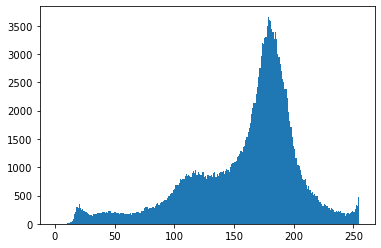

In [5]:
plt.hist(img.ravel(),256)
plt.show()

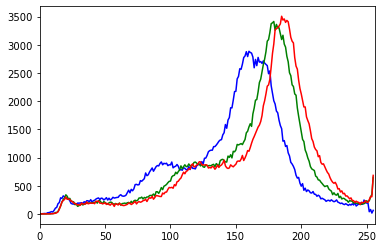

In [8]:
img = cv2.imread('cat.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color=col)
    plt.xlim([0,256])

## mask

In [18]:
# 创建mask
print(img.shape)
print(img.shape[:2])
# 截去不要的部分为0
mask = np.zeros(img.shape[:2],np.uint8)
# 要取用的部分255
mask[100:300,100:400] = 255
cv_show(mask,'mask')

(414, 500)
(414, 500)


In [19]:
img = cv2.imread('cat.jpg',0)
masked_img = cv2.bitwise_and(img,img,mask=mask)# 与操作
cv_show(masked_img,'masked_img')

In [16]:
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

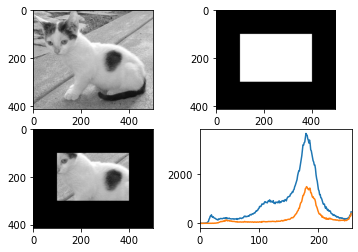

In [20]:
plt.subplot(221)
plt.imshow(img,'gray')

plt.subplot(222)
plt.imshow(mask,'gray')

plt.subplot(223)
plt.imshow(masked_img,'gray')

plt.subplot(224)
plt.plot(hist_full)
plt.plot(hist_mask)

plt.xlim([0,256])
plt.show()

## 直方图均衡化

![hist_4.png](hist_4.png)

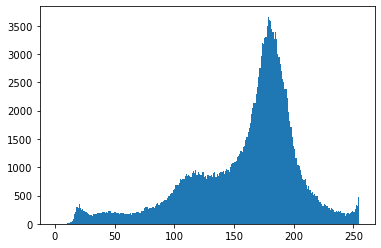

In [21]:
img = cv2.imread('cat.jpg',0)
plt.hist(img.ravel(),256)
plt.show()

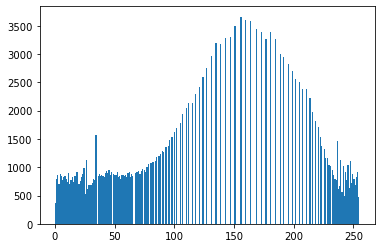

In [22]:
equ = cv2.equalizeHist(img)
plt.hist(equ.ravel(),256)
plt.show()

In [23]:
res = np.hstack((img,equ))
cv_show(res,'res')
# 有点提升对比度

## 自适应直方图均衡化

分成小块分别做均衡化

In [24]:
clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8,9))

In [25]:
res_clahe = clahe.apply(img)
res = np.hstack((img,equ,res_clahe))
cv_show(res,'res')

# 傅里叶变换

在频域中一切都是静止的

## 傅里叶变换的作用
+ 高频：变化剧烈的灰度方向，例如边界
+ 低频：变化缓慢的灰度分量，例如一片大海

## 滤波
+ 低通滤波器：只保留低频，会使图像变得模糊
+ 高通滤波器：只保留高频，会使图像细节增强

----------
+ opencv中主要就是cv2.dft()和cv2.idft()，输入图像需要先转换np.float32
+ 得到的结果中频率为0的部分会在左上角，通常需要T通过shift转换到图像中心
+ cv2.dift()返回的结果是双通道的（实部、虚部）,通常还需要转换图像格式（0，255）

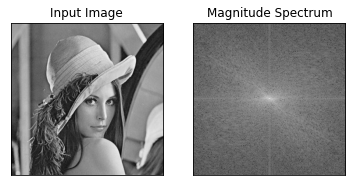

In [26]:
img = cv2.imread('lena.jpg',0)
img_float32 = np.float32(img)

dft = cv2.dft(img_float32,flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
# 0,1通道得到灰度图能表示的格式
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.subplot(121)
plt.imshow(img,cmap='gray')
plt.title('Input Image')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(magnitude_spectrum,cmap='gray')
plt.title('Magnitude Spectrum')
plt.xticks([])
plt.yticks([])
plt.show()

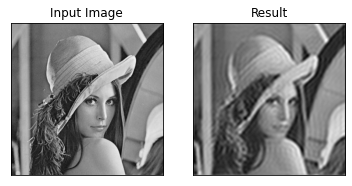

In [29]:

img = cv2.imread('lena.jpg',0)

img_float32 = np.float32(img)

dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

rows, cols = img.shape
crow, ccol = int(rows/2) , int(cols/2)     # 中心位置

# 低通滤波
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# IDFT（DFT逆运算）
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Result'), plt.xticks([]), plt.yticks([])

plt.show()   

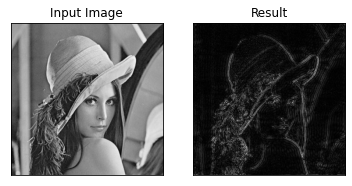

In [30]:
img = cv2.imread('lena.jpg',0)

img_float32 = np.float32(img)

dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

rows, cols = img.shape
crow, ccol = int(rows/2) , int(cols/2)     # 中心位置

# 高通滤波
mask = np.ones((rows, cols, 2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 0

# IDFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Result'), plt.xticks([]), plt.yticks([])

plt.show()    